<a href="https://colab.research.google.com/github/824024445/KaggleCases/blob/master/Titanic(%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 机器学习经典Kaggle案例[泰坦尼克号：从灾难中学习机器](https://www.kaggle.com/c/titanic)


## 一、简介

泰坦尼克号案例可以说是kaggle的“hello world”，入门者的必看案例。

### 1.1 比赛描述

RMS泰坦尼克号沉没是历史上最臭名昭着的沉船之一。1912年4月15日，在她的处女航中，泰坦尼克号在与冰山相撞后沉没，在2224名乘客和机组人员中造成1502人死亡。这场耸人听闻的悲剧震惊了国际社会，并为船舶制定了更好的安全规定。

造成海难失事的原因之一是乘客和机组人员没有足够的救生艇。尽管幸存下沉有一些幸运因素，但有些人比其他人更容易生存，例如妇女，儿童和上流社会。

在这个挑战中，我们要求您完成对哪些人可能存活的分析。特别是，我们要求您运用机器学习工具来预测哪些乘客幸免于悲剧

### 1.2 比赛评估

**目标**

你的工作是预测一名乘客是否能够幸免于泰坦尼克号沉没。
对于测试集中的每个，您必须预测变量的0或1值。

**度量**

您的分数是您正确预测的乘客百分比。这简称为“准确度”

**提交文件格式**

参考示例提交文件（gender_submission.csv）。

### 1.3 数据描述


<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>生存</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>票务舱</td>
<td>1 = 1st（上等）, 2 = 2nd（中等）, 3 = 3rd（下等）</td>
</tr>
<tr>
<td>sex</td>
<td>性别</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>年龄</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td>泰坦尼克号上的兄弟姐妹/配偶的人数</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td>泰坦尼克号上的父母/孩子的人数</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>票号</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>乘客花费</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>客舱号码</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>登船港口</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>


其中
sibsp：数据集定义这样的家庭关系......  
兄弟姐妹=兄弟，姐妹，同父异母的弟弟，义妹  
配偶=丈夫，妻子（包二奶和未婚夫被忽略）  

parch：将数据集定义这样的家庭关系......  
父母=母亲，父亲  
孩子=女儿，儿子，继女，继子  
有些孩子只带着保姆旅行，因此对他们来说parch = 0

### 1.5 工作流程

1. 问题或问题的定义。 
2. 获取训练和测试数据。 
3. 数据清洗，准备，清理数据。 
4. 分析，识别模式并探索数据。 
5. 建模，预测和解决问题。 
6. 可视化，报告和呈现问题解决步骤和最终解决方案。 
7. 提供或提交结果。

## 二、代码
话不多少，开始行动吧

### 2.1 获取数据

#### 2.1.1 下载数据
我写了一个小函数来实现数据的下载，数据全都是官网原版数据，我存到了我的github上。（https://github.com/824024445/KaggleCases）  

所有数据都下载到了你当前文件夹下的datasets文件下，每个案例涉及到的数据全部下载到了以该案例命名的文件夹下。  

我所有的kaggle案例的博客，下载数据均会使用这个函数，只需要修改前两个常量即可。
> 注：此函数只用于下载数据，函数在该代码框内就运行了。不再用到其它代码中，包括常量，也不会用在其他地方。

In [0]:
import os
import zipfile
from six.moves import urllib

FILE_NAME = "titanic.zip" #文件名
DATA_PATH ="datasets/titanic" #存储文件的文件夹，取跟文件相同（相近）的名字便于区分
DATA_URL = "https://github.com/824024445/KaggleCases/blob/master/datasets/" + FILE_NAME + "?raw=true"


def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_name=FILE_NAME):
    if not os.path.isdir(data_path): #查看当前文件夹下是否存在"datasets/titanic"，没有的话创建
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, file_name) #下载到本地的文件的路径及名称
    # urlretrieve()方法直接将远程数据下载到本地
    urllib.request.urlretrieve(data_url, zip_path) #第二个参数zip_path是保存到的本地路径
    data_zip = zipfile.ZipFile(zip_path)
    data_zip.extractall(path=data_path) #什么参数都不输入就是默认解压到当前文件,为了保持统一，是泰坦尼克的数据就全部存到titanic文件夹下
    data_zip.close()
fetch_data()

#### 2.1.2 读取数据

In [142]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("datasets/titanic/train.csv")
test_df = pd.read_csv("datasets/titanic/test.csv")
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 通过描述数据进行分析


#### 2.2.1 直接观察+info()

首先，通过观察数据(**直接观察+info()**)，可知一些基本信息：
- 哪些特征是**类目**？是基于名称、序数、比值还是区间？Survived, Sex, Embarked， Pclass（序数）
- 哪些特征是**数字**？是连续的、离散的还是基于时间序列的？连续值：Age, Fare.离散值：SibSp, Parch
- 哪些特征是**混合型数据**？Ticket，Cabin
- 哪些特征可能包含**拼写错误**或者其它错误？Name
- 哪些特征可能包含**空值、null或者空格**？Cabin > Age > Embarked关于null，Cabin > Age 关于空值
- 各个特征的**数据类型**是什么？七个特征是整数或浮点数，五个特征是字符串

In [143]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

#### 2.2.2 describe()针对数值型数据

因为数值型数据有很多数学特征，所以专门针对数值型数据进行观察，可以观察的有：**计数、平均值、标准差、四分位、最大值、最小值**等等。本例可观察到的信息有：
- 总共891个样本，占总样本数(2224)的40%
- 存活是一个取值0和1的类目特征，大概有38%的人存活了下来（实际存活率是32%）
- 年龄在65-80岁之间的老年乘客（<1％）很少
- 大约30%的乘客有兄弟姐妹或者配偶。（sibsp观察50%分位）
- 大多数乘客(>75%)没有和父母和孩子一起旅行。（parch观察75%分位）
- 很少有乘客（<1％）能够支付高达512美元的票价




In [144]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2.2.3 describe(include=['O'])针对类目特征

能够观察到一下信息：
- 名称在整个数据集中是唯一的（count = unique = 891）
- 性别中男性比较多577
- 票号有22%重复的值
- 客舱有几种，有四个人住同一间的
- 大多数人从S港上船

In [145]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Smith, Mr. James Clinch",male,347082,B96 B98,S
freq,1,577,7,4,644


#### 2.2.4 matplotlib观察各特征之间的关系

这个只是查看数值型数据的数量分布，在本例中跟上面得到的结论有些重复。比如能看出各年龄层的分布、花费的分布、带配偶的分布。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa1c684f98>,
      dtype=object)

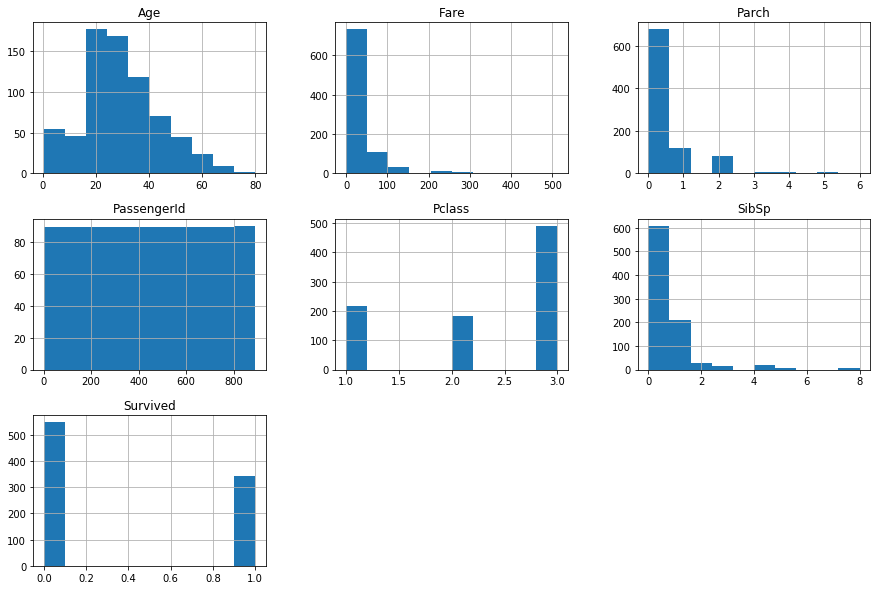

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

train_df.hist(figsize=(15,10))

#### 2.2.5 基于初始阶段数据分析的假设

进行上面的分析，我们主要是想做的事情有：
- 了解相关性：我们想知道每个特征与生存的相关性
- 纠正删除特征：一些特性可能需要删除：ticket（票号）重复值太多（22%），而且它与是否生存之间没有相关性；cabin（船舱）有太多的缺失值；PassengerId更是没有什么用处；Name不仅难处理，更没什么用处；
- 创建新特征：有些特征本身与目标值相关性很低，但是可以通过组合创建新的特征来表现出很好的相关性：综合Parch和SibSp可以获得家庭成员的总数；将年龄划分成年龄段新特征；票价划分成区间新特征；
- 做出假设：
  - 假设1：女人更可能生存
  - 假设2：孩子(Age<?)更可能生存
  - 假设3：上层乘客(Pclass=1)更有可能生存
下一小节，寻找需要创建的新特征，以及对假设进行验证


#### 2.2.6 验证假设

将性别、年龄、阶层、家庭成员单拎出来查看生存情况

In [147]:
#Pclass 查看阶层与生存的关系
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#阶层越高生存率越高（验证了假设3）

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [148]:
#Sex 性别与生存的关系
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#女性生存率很高（验证了假设1）

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [149]:
#SibSp 兄弟姐妹、配偶与生存的关系
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#兄弟姐妹配偶在1--2人时存活率高于孤身一人，超过2人则低于孤身一人

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [150]:
#Parch 父母、孩子与生存的关系
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#同行的父母孩子三个或者一个或者两个的时候，生存率高于孤身一人。高于3人则负相关。

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**通过可视化数据进行分析**：像age这种数据，最好是分段查看，但是贸然分段也不是很明智，这种数据可以使用直方图进行查看。

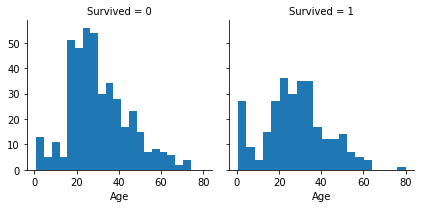

In [151]:
#age 年龄与生存的关系
import seaborn as sns

g = sns.FacetGrid(train_df, col='Survived') #col:跨列共享y轴"survived"，row参数是跨行共享x轴
g.map(plt.hist, 'Age', bins=20) #bins是指每个图柱子的个数

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


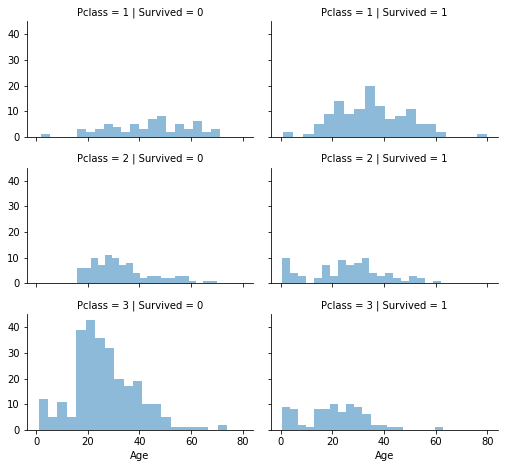

In [152]:
#age&Pclass 不同阶层不同年龄与生存的关系。将年龄和阶层进一步划分
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass", size=2.2, aspect=1.6) #size:图形大小 aspect：图形的纵横比
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend()

图形的很坐标均是age，第一个图的纵坐标是阶层为1没有生存的人数，第二个图的纵坐标是阶层为1生存的人数。等等。  

观察到：
- 阶层3的人最多，但是死亡的人数也最多（验证了假设3）
- 阶层2和阶层3的婴儿生存率较高（验证了假设2）

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


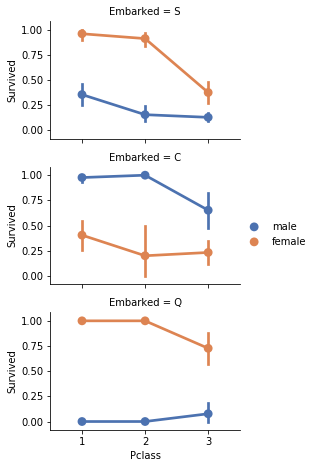

In [153]:
#将类目特征和目标值关联
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

观察到：
- 女性具有更好的生存率。但是在登陆港口为C的时候是个例外，在该港口登录的人中，男性具有更高的生存率，这可能是Pclas和Embarked之间的相关性。

### 2.3数据清洗

#### 2.3.1 删除数据

根据我们之前的假设，Cabin、Ticket、passengerid，name用处可能不大。  
首先我们先删除Cabin，Ticket这两个数据质量差的特征。注意要对训练集和测试集执行相同的操作

In [154]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(["Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


#### 2.3.2 从已有特征中提取新特征
对于passengerid，name。其数据质量不差，所以先测试一下这两者与生存之间的相关性再决定是否删除。

In [155]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex']) ##交叉表(crossTab)，交叉表是用于统计分组频率的特殊透视表

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


对于上面title的结果，可以看出master，mr，mrrs，miss占了绝大部分，我们可以吧一些数量很少的title合并成一个，rare.其余意思是一样的title（不明白，可能得需要对国外姓氏比较了解吧）

In [156]:
for dataset in combine:
  dataset["Title"] = dataset["Title"].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


我们应该把类别替换成数字

In [157]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    # dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在从name中找到了与生存更相关的title，name可以删除掉了

In [160]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

现在将字符串特征转换为数值

In [161]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


#### 2.3.3 填充缺失值和空值

首先为age执行通常遇到缺值的情况，我们会有几种常见的处理方式

- 如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了.如cabin
- 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中
- 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step，然后把它离散化，之后把NaN作为一个type加到属性类目中。
- 有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。
- 本例中，后两种处理方式应该都是可行的，我们先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)本例使用Age，Gender和Pclass之间的相关性填补age


In [162]:
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


下面将age离散化吧

In [167]:
train_df["AgeBand"] = pd.cut(train_df["Age"], 5)
train_df[["AgeBand", "Survived"]].groupby("AgeBand", as_index=False).mean().sort_values(by="AgeBand")

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


下面用数字把区间换掉

In [179]:
for dataset in combine:    
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0 
    #关于loc的用法：[["one", "two"]]是取"one""two"两行，["one", "two"]是取"one"行，"two"列
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


AgeBand已经没用了（作用是提供了怎样划分区间，以及指导该划分区间的方式与生存有没有相关性），可以删除了

In [181]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### 2.3.4 从已有特征中创建新特征（不同于2.3.2）
我们可以结合Parch和SibSp，创建一个新特征FamilySize

In [187]:
for dataset in combine:
  dataset["FamilySize"] = dataset["Parch"] + dataset["SibSp"] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


我们还可以创建一个新的特征isalone

In [188]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


放弃Parch，SibSp和FamilySize特征，转而使用IsAlone。（舍弃FamilySize是因为它没有太大规律性）

In [189]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


我们还可以创建一个结合Pclass和Age的人工特征。

In [190]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)


,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### 2.3.5 处理类目特征

Embarked（登录港口）：S, Q, C；

首先出来它的缺失值，只有两个，可以用众数填充

In [192]:
freq_port = train_df.Embarked.dropna().mode()[0] #mode是众数
freq_port

'S'

In [193]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


将类目特征也转成数字

In [194]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


#### 2.3.6 填充转换数字特征
fare(只有测试集有两个缺失值)

In [195]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


还可以创建FareBand

In [198]:
train_df["FareBand"] = pd.qcut(train_df["Fare"], 5)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [199]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


### 2.3 模型和预测

In [202]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

#### 2.3.1 逻辑回归（Logistic Regression）
逻辑回归是可以用于分类的。通常用于估计一个实例属于某个特定类别的概率。

In [203]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

我们可以使用Logistic回归来验证我们对功能创建和完成目标的假设和决策。这可以通过计算决策函数中的特征的系数来完成。

In [218]:
coeff_df = pd.DataFrame(train_df.columns.delete(0), columns=["Feature"])
coeff_df["Correlation"] = pd.Series(log_reg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287164
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311199
0,Pclass,-0.749006


#### 2.3.2 支持向量机（SVM）

In [223]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

#### 2.3.3 k近邻（k-Nearest Neighbors）
k-Nearest Neighbors算法（或简称k-NN）是用于分类和回归的非参数方法。样本按其邻居的多数票进行分类，样本被分配给其k个最近邻居中最常见的类（k是正整数，通常很小）。如果k = 1，则简单地将对象分配给该单个最近邻居的类

In [225]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

#### 2.3.4 高斯朴素贝叶斯（Gaussian Naive Bayes）
朴素贝叶斯分类器是一系列简单的概率分类器

In [226]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

#### 2.3.5 感知器（Perceptron）
是用于二元分类器的监督学习的算法，可以决定由数字向量表示的输入是否属于某个特定类的函数

In [227]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

#### 2.3.6 线性SVC


In [228]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.56

#### 2.3.7 随机梯度下降(Stochastic Gradient Descent)

In [229]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.21

#### 决策树（Decision Tree）


In [230]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

#### 2.3.8 随机森林


In [249]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

#### 2.3.9 模型评估
我们现在可以对所有模型进行评估，以便为我们的问题选择最佳模型。虽然决策树和随机森林得分相同，但我们选择使用随机森林来纠正决策树过度拟合其训练集的习惯

In [248]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by="Score", ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,78.56
5,Perceptron,78.34
6,Stochastic Gradient Decent,76.21
4,Naive Bayes,72.28


In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)

这个在kaggle分数是0.78468。分数不高。我也是做完才知道emem。。。

必然如此，使用的这些模型，全部都没有调参，全部用的默认的参数。也没有使用集成方法（随机森林除外）